<a href="https://colab.research.google.com/github/andrewbowen19/CUNY-PythonBrige/blob/main/AndrewBowen_MathwithPython_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 1.  Programming Challenge 1 page 22, Even-Odd Vending Machine

Try writing an “even-odd vending machine,” which will take a number as
input and do two things:
1. Print whether the number is even or odd.
2. Display the number followed by the next 9 even or odd numbers.
If the input is 2, the program should print even and then print 2, 4, 6,
8, 10, 12, 14, 16, 18, 20. Similarly, if the input is 1, the program should
print odd and then print 1, 3, 5, 7, 9, 11, 13, 15, 17, 19.

Working with Numbers 23
Your program should use the is_integer() method to display an error
message if the input is a number with significant digits beyond the decimal
point.

In [ ]:
def even_odd_vending_machine(n:int):

  # Checking type first
  if not float(n).is_integer():
    raise(TypeError)

  if (n % 2) == 0:
    print('Even')
  else:
    print("Odd")

  for i in range(0, 9):
      print(n + (2 * i))

    

In [ ]:
even_odd_vending_machine(18)

Even
18
20
22
24
26
28
30
32
34


## Exploring a Quadratic Function visually



x=-8, y=49
x=-3, y=4
x=1, y=4
x=2, y=9
x=5, y=36
x=6, y=49
x=8, y=81
x=9, y=100
x=11, y=144
x=15, y=256


Text(0.5, 1.0, 'Quadratic function')

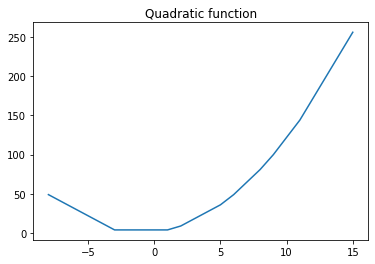

In [ ]:
import matplotlib.pyplot as plt

def quadratic(x):
  return x**2 + 2*x + 1


x_vals = [-8, -3, 1, 2, 5, 6, 8, 9, 11, 15]

y_vals = []

for x in x_vals:
  y = quadratic(x)
  print(f"x={x}, y={y}")
  y_vals.append(y)


plt.plot(x_vals, y_vals)
plt.title("Quadratic function")


y varies non-linearly with x in the graph above.

#### Chapter 3.  Programming Challenge 2 page 89, Statistics Calculator


Implement a statistics calculator that takes a list of numbers in the file
`mydata.txt` (values copied into local file) and then calculates and prints their mean, median, mode,
variance, and standard deviation using the functions we wrote earlier in
this chapter.

In [ ]:
from collections import Counter

def calculate_mean(numbers):
  s = sum(numbers)
  N = len(numbers)
  mean = s / N
  return mean

def find_differences(numbers):
  # Find the mean
  mean = calculate_mean(numbers)
  # Find the differences from the mean
  diff = []

  for num in numbers:
    diff.append(num - mean)
  return diff


def calculate_variance(numbers):
  # Find the list of differences
  diff = find_differences(numbers)
  # Find the squared differences
  squared_diff = []
  for d in diff:
    squared_diff.append(d**2)
  # Find the variance
  sum_squared_diff = sum(squared_diff)
  variance = sum_squared_diff/len(numbers)

  return variance


def calculate_median(numbers):
  N = len(numbers)
  numbers.sort()
  # Find the median
  if N % 2 == 0:
    # if N is even
    m1 = N/2
    m2 = (N/2) + 1
    # Convert to integer, match position
    m1 = int(m1) - 1
    m2 = int(m2) - 1
    median = (numbers[m1] + numbers[m2])/2
  else:
    m = (N+1)/2
    # Convert to integer, match position
    m = int(m) - 1
    median = numbers[m]
  return median


def calculate_mode(numbers):
  c = Counter(numbers)
  numbers_freq = c.most_common()
  max_count = numbers_freq[0][1]
  modes = []
  for num, count in numbers_freq:
    if count == max_count:
      modes.append(num)

  return tuple(modes)
  

In [ ]:
from math import sqrt
data = list()

with open("mydata.txt", "r") as f:
  for l in f:
    data.append(float(l))

print(data)

# Calculating statistics of our data set
mode = calculate_mode(data)
mean = calculate_mean(data)
variance = calculate_variance(data)
std_dev = sqrt(variance)
median = calculate_median(data)

# Printing statistics to screen
print(f'Mode: {mode}')
print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Variance: {variance}')
print(f'Std Dev: {std_dev}')



[100.0, 60.0, 70.0, 900.0, 100.0, 200.0, 500.0, 500.0, 503.0, 600.0, 1000.0, 1200.0]
Mode: (100.0, 500.0)
Mean: 477.75
Median: 500.0
Variance: 141047.35416666666
Std Dev: 375.5627166887931


# 4
Chapter 4.  Programming Challenge 4 page 117, Solving Single-Variable Inequalities

In [ ]:
from sympy import *

In [ ]:
def isolve():
  i = input("Please input your inequality: ")
  
  ineq_obj = sympy.sympify(i)

  print(ineq_obj)
  
  # Checking if the expression is a polynomial or rational
  if ineq_obj.is_Poly:
    lhs = ineq_obj.lhs
    p = Poly(lhs, x)
    rel = ineq_obj.rel_op
    return solve_poly_inequality(p, rel)

  if ineq_obj.is_Rational:
    lhs = ineq_obj.lhs
    numer, denom = lhs.as_numer_denom()
    p1 = Poly(numer)
    p2 = Poly(denom)
    rel = ineq_obj.rel_op
    return solve_rational_inequalities([[((p1, p2), rel)]])

  # Univariate to solve the rest
  else:
    return solve_univariate_inequality(ineq_obj, x, relational=False)


xx = isolve()

print(xx)

Please input your inequality: sin(x) + 6 > 2
sin(x) + 6 > 2
Reals


## 5

Chapter 5.  Programming Challenge 2 page 143, Law of Large Numbers

In [ ]:
from random import randint

def roll_die(n_sides=6):
  return randint(1, n_sides)

In [ ]:
n_rolls = [100, 1000, 10000, 100000, 500000]

In [ ]:
# Looping over iteration numbers (n)
print("Expected value: 3.5")

for n in n_rolls:
  results = []
  for i in range(n):
    results.append(roll_die())

  trial_avg = calculate_mean(results)
  print(f"Trials {n} Trial average: {trial_avg}")


Expected value: 3.5
Trials 100 Trial average: 3.48
Trials 1000 Trial average: 3.593
Trials 10000 Trial average: 3.4795
Trials 100000 Trial average: 3.49434
Trials 500000 Trial average: 3.497104


## 7

**Chapter 7.  Programming Challenge 2 page 205, Implement the Gradient Descent**


The gradient descent method is used to find the minimum value of a func-
tion. Similar to the gradient ascent method, the gradient descent method is an iterative method: we start with an initial value of the variable and gradually get closer to the variable value that corresponds to the minimum value of the function. The step that gets us closer is the equation

$x_{new} = x_{old} − λ(df/dx)$ ,

where λ is the step size and

$df / dx$ is the result of differentiating the function. Thus, the only difference
from the gradient ascent method is how we obtain the value of $x_{new}$ from
$x_{old}$.

Your challenge is to implement a generic program using the gradient
descent algorithm to find the minimum value of a single-variable function
specified as input by the user. The program should also create a graph of the function and show all the intermediate values it found before find-
ing the minimum. (You may want to refer to Figure 7-5 on page 193.)

In [ ]:
from sympy import Symbol, exp, sqrt, pi, Integral, S

In [ ]:


def gradient_descent(l = 0.01):
  '''Implement gradient descent for user-inputted function
  
  params:
    l : int (default 0.01): step size (lambda to use)
  
  '''
  x = Symbol('x')
  user_input = sympy.exp((x - 10)**2/2)/sympy.sqrt(2*sympy.pi)##input("Please enter your function here: ")


  func = sympify(user_input)

  print(func)

  derivative = sympy.diff(func, x)



  
gradient_descent()

sqrt(2)*exp((x - 10)**2/2)/(2*sqrt(pi))
sqrt(2)*(x - 10)*exp((x - 10)**2/2)/(2*sqrt(pi))


Enter a function in one variable: x**2
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.4
Min value: 0.0499816790547741


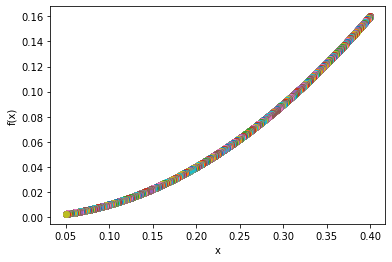

In [ ]:
def grad_descent(x0, fx, x, epsilon = 1e-5, step_size = 1e-4):
  x_old = x0
  f1x = Derivative(fx, x).doit()
  x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()

  f, ax = plt.subplots()
  while abs(x_old - x_new) > epsilon:
    x_old = x_new
    x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()

    ax.scatter(x_new, fx.subs({x:x_old}).evalf())
  ax.set_xlabel("x")
  ax.set_ylabel("f(x)")

  return x_new

f = input('Enter a one-variable function: ')
var = input('Enter the variable to differentiate with respect to: ')
initial_value = float(input('Enter the initial value of the variable: '))
try:
  f = sympify(f)
except SympifyError:
  print('Invalid function, please try again')
else:
  var = Symbol(var)
  d = Derivative(f, var).doit()
  var_min = grad_descent(initial_value, f, var)
  print('----------------------------------------')
  print(f'Min value: {var_min}')

In [ ]:
# Converting to HTML for submission!

%%shell
jupyter nbconvert --to html /content/AndrewBowen_MathwithPython_HW1.ipynb

[NbConvertApp] Converting notebook /content/AndrewBowen_MathwithPython_HW1.ipynb to html
[NbConvertApp] Writing 345849 bytes to /content/AndrewBowen_MathwithPython_HW1.html
